# Project 4 - Matan Segal

The area of algorithm I chose is number theoretic algorithm.
The problem I chose in the area is finding the greatest common divider (GCD) of two integers. The GCD is useful for reducing fractions to be the lowest terms. Also, it is useful to find the least common multiple of two integers which helpful in solving Diophantine equations which are main subject in chemical euqations and Cryptography methods.

### Trivial solution:

First, I will implement the trivial solution in order to find the GCD. The trivial solution is simple iteration trough all the integers until we get to the smaller number among the two given integers:

In [130]:
def trivial_GCD(a,b):
    gcd = 1
    for i in range(2,min(a,b)+1):
        if(a%i == 0 and b%i == 0):
            gcd = i
            
    return gcd

Testing the trivial solution for the GCD with 1768 and 255:

In [131]:
trivial_GCD(1768,255)

17

We can clearly see that the $big-O$ of this algorithm is $O(n)$ where $n$ is $min(a,b)$

### Non-trivial Solution:

The non-trivial solution and currently the most efficient way finding the GCD, is the ***Euclidean’s Algorithm***. The algorithm based on the principle that the GCD of two numbers is the same as the GCD of the reminder of dividing the larger number by the smaller one and the smaller number. Since this procedure decrease the size of the numbers, The GCD will be the last non-zero reminder. 
Proof of this principle we can see below[1]:

Suppose we have three integers $A,B$ and $C$ such that $A-B=C$.

Proof that the $GCD(A,B)$ evenly divides $C$:

The $GCD(A,B)$, by definition, evenly divides $A$. As a result, $A$ must be some multiple of $GCD(A,B)$. 

i.e. $X⋅GCD(A,B)=A$ where $X$ is some integer

The $GCD(A,B)$, by definition, evenly divides $B$. As a result, $B$ must be some multiple of $GCD(A,B)$. 

i.e. $Y⋅GCD(A,B)=B$ where $Y$ is some integer

$A-B=C$ gives us:

$X⋅GCD(A,B) - Y⋅GCD(A,B) = C$

$(X - Y)⋅GCD(A,B) = C$

So we can see that $GCD(A,B)$ evenly divides $C$.

The same procedure will be repeated until the reminder will be zero, while the $GCD$ of $A$ and $B$ is the reminder one iteration before it.

[1] https://www.khanacademy.org/computing/computer-science/cryptography/modarithmetic/a/the-euclidean-algorithm



In [132]:
def GCD(a,b):
    # let a be larger than b
    r = a % b
    # base case
    if (r == 0):
        # b is the previous reminder
        return b
    # sending b as a and r as b
    return GCD(b,r)

In [133]:
GCD(1768,255)

17

Since each iteration the numbers gets smaller by unknown value the $big-O$ of this algorithm can not be determined, but on average, it performs better than $O(lgn)$ because each iteration the numbers get smaller by more than half. the algorithm never requires more steps than five times the number of digits of the smaller integer.

### Comparison

In order to compare their time performance, I will randomly send two numbers to both function starting with four-digit number and a three-digit number and go up to an nine-digit number and a eight-digit number. Each step I will run 3 time. 

In [134]:
import random
import time

low = 100
med = 1000
high = 10000

trival = []
nonTri = []

for i in range(6):
    for j in range(3):
        b = random.randint(low, med)
        a = random.randint(med, high)
        t1 = time.time()
        sol1 = trivial_GCD(a,b)
        t2 = time.time()
        sol2 = GCD(a,b)
        t3 = time.time()
        print('\nNumbers:',a,b)
        print('  Trivial:   ',sol1,'time:',t2-t1)
        print('  Non-trivial:',sol2,'time:',t3-t2)
        trival.append(t2-t1)
        nonTri.append(t3-t2)
    
    low = med
    med = high 
    high = high *10



Numbers: 4343 893
  Trivial:    1 time: 0.001020193099975586
  Non-trivial: 1 time: 0.0

Numbers: 1344 834
  Trivial:    6 time: 0.0
  Non-trivial: 6 time: 0.0

Numbers: 2993 187
  Trivial:    1 time: 0.0
  Non-trivial: 1 time: 0.0

Numbers: 48677 5229
  Trivial:    1 time: 0.0
  Non-trivial: 1 time: 0.0

Numbers: 73915 7624
  Trivial:    1 time: 0.0
  Non-trivial: 1 time: 0.0

Numbers: 31083 9614
  Trivial:    1 time: 0.0009984970092773438
  Non-trivial: 1 time: 0.0

Numbers: 160111 99932
  Trivial:    7 time: 0.009986400604248047
  Non-trivial: 7 time: 0.0

Numbers: 189080 13843
  Trivial:    1 time: 0.002007007598876953
  Non-trivial: 1 time: 0.0

Numbers: 256263 83772
  Trivial:    3 time: 0.010993242263793945
  Non-trivial: 3 time: 0.0

Numbers: 4431919 897687
  Trivial:    1 time: 0.14599990844726562
  Non-trivial: 1 time: 0.0

Numbers: 7105482 601564
  Trivial:    2 time: 0.07699871063232422
  Non-trivial: 2 time: 0.0

Numbers: 8430830 260894
  Trivial:    2 time: 0.03001189231

In [135]:
# continuing just with the euclidean algorith until the sensitivity of the time
# function can declare the running time of the algorithm

t = 0

while t == 0:  
    b = random.randint(low, med)
    a = random.randint(med, high)
    t2 = time.time()
    sol2 = GCD(a,b)
    t3 = time.time()
    t = t3-t2
    print('\nNumbers:\n',a,'\n',b)
    print('  GCD:',sol2,'time:',t)
    nonTri.append(t)
    low = med
    med = high 
    high = high *10


Numbers:
 9154122459 
 585577083
  GCD: 3 time: 0.0

Numbers:
 91908880438 
 2460610194
  GCD: 2 time: 0.0

Numbers:
 606497222470 
 30121862521
  GCD: 1 time: 0.0

Numbers:
 4135958052275 
 770174379392
  GCD: 1 time: 0.0

Numbers:
 10367833942227 
 7952935186592
  GCD: 1 time: 0.0

Numbers:
 986146966860976 
 43127091399306
  GCD: 2 time: 0.0

Numbers:
 2942679612263863 
 186163948445120
  GCD: 1 time: 0.0

Numbers:
 43896083429010674 
 8815292253360258
  GCD: 2 time: 0.0

Numbers:
 880663918973810332 
 55013048468957682
  GCD: 2 time: 0.0

Numbers:
 1921391596752636319 
 569744411836767694
  GCD: 1 time: 0.0

Numbers:
 29551819259251103845 
 2164167751529943016
  GCD: 1 time: 0.0

Numbers:
 634224626457749970371 
 41933074558561403783
  GCD: 1 time: 0.0

Numbers:
 5782802254328337452885 
 882598012183130277099
  GCD: 1 time: 0.0

Numbers:
 72160433788269363722297 
 6667529362588810632797
  GCD: 1 time: 0.0

Numbers:
 657856055047261060111664 
 83588981223297093320068
  GCD: 4 time:

In [136]:
# print the number of digits range on the last iteration
import math

b_range = (int(math.log10(low))+1,int(math.log10(med))+1)
a_range = (int(math.log10(med))+1,int(math.log10(high))+1)

print('b_range:',b_range)
print('a_range:',a_range)

b_range: (31, 32)
a_range: (32, 33)


It is possible to messure the running time of the Euclidean algorithm just when we are using numbers with more than 31 digits!

In [143]:
# contine with the Euclidean algorithm:
while math.log10(high) < 1500:  
    b = random.randint(low, med)
    a = random.randint(med, high)
    t2 = time.time()
    sol2 = GCD(a,b)
    t3 = time.time()
    t = t3-t2
    nonTri.append(t)
    low = med
    med = high 
    high = high *10

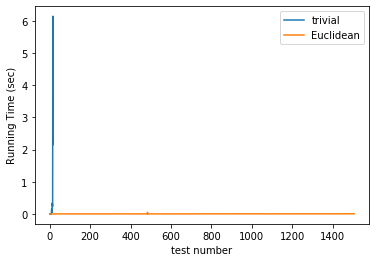

In [144]:
import matplotlib.pyplot as plt

plt.ylabel('Running Time (sec)')
plt.xlabel('test number')
plt.plot(trival, label="trivial")
plt.plot(nonTri, label="Euclidean")
plt.legend()

Even when calculating the GCD of almost 1500 digit numbers, the Euclidean algorithm's run time is barely measurable! 

## The extended Euclidean algorithm

The greatness of the Euclidean algorithm I described above is actually not finding the GCD, but its leading to the implementation of the extended Euclidean algorithm. It is used for finding the greatest common divisor of two positive integers a and b and writing this greatest common divisor as an integer linear combination of a and b. For example, let $c = GCD(a,b)$ so c can be written as $$ax + by = c$$ 

where x and y are integers. This linear connection called Diophantine equations, and the extended Euclidean algorithm give us the a solution of this equation.

The steps of this algorithm are given below[2]:
1.	Set the value of the variable c to the larger of the two values a and b, and set d to the smaller of a and b.
2.	Find the quotient and the remainder when c is divided by d. Call the quotient q and the remainder r. Use the division algorithm and expressions for previous remainders to write an expression for r in terms of a and b.
3.	If r = 0, then $gcd(a, b) = d$. The expression for the previous value of r gives an expression for $gcd(a, b)$ in terms of a and b. Stop.
4.	Otherwise, use the current values of d and r as the new values of c and d, respectively, and go back to step 2.


#### We should define between three cases:
-	**Case 1: c = gcd(a, b):**
Like we saw before, in this case we will be able to find the solution for the  Diophantine equations where 𝑎𝑥+𝑏𝑦=𝑐.
-	**Case 2: c is a multiple of gcd(a, b):**
Let c be multiply by k, so we will have the equation 𝑎𝑥’+𝑏𝑦’=𝑐k. If we will use the equation from case 1 and multiply it by k, we will get: 𝑎𝑥k+𝑏𝑦k=𝑐k, means that x’ = xk ad y’ = yk. Since multiplication of integers is always an integer this is the solution for the Diophantine equation.
-	**Case 3: c is not a multiple of gcd(a, b):**
In this case, it turns out that If c is not a multiple of gcd(a, b), then there are no integer solutions to the equation ax + by = c, means no solution for the  Diophantine equation. Using this statement means that **the extended Euclidean Algorithm is a way to know if there is a solution for a Diophantine equation and a way to find it.**

[2] http://www.math.cmu.edu/~bkell/21110-2010s/extended-euclidean.html


In [2]:
# returns the solution for xa + yb = c and the gcd
# as (x,y,gcd)
def ex_Euclidean(a,b,c):    
       
    # list to store all the multiplyer m in each step such that
    # a = mb + r, until we get a reminder of 0
    m_list = []
    r = 1
    
    # using iterative Euclidean algorithm:
    while r != 0:
        r = a % b
        m = int(a/b)
        m_list.append(m)
        a , b = b , r
    
    # end the while loop with a as the gcd
    # check if there is a solution
    gcd = a
    if c % gcd != 0:
        return False 
    
    # multiplyer
    k = int(c/gcd)    
    
    #since we start from the last to the first, reverse the order
    m_list.reverse()
    
    # since we will represent the equation as r = a -mb, we see that 
    # it start as x = 1 nd y = -m 
    x = 1
    y = -m_list[1] # -m, skipping the last step where r = 0
    for i in range(2,len(m_list)):
        tmp = x
        x = y
        y = y*(-m_list[i])+tmp
        
    # return the values times the multiplyer k and the gcd
    return k*x,k*y,gcd
    

In [195]:
l = ex_Euclidean(1180,482,2)

In [196]:
if l:
    print(l[:2])
else:
    print("No integer solution")

(-29, 71)


The values we recived back is a solution for the equation $$x 1180 + y 482 = 2$$

Which is $x = -29 , y = 71$ 


### Getting all the solutions
The solution we saw above is just one solution among infinite of solutions, so we will represent it as:  


In order to have the set of all the solutions we will go through the following procedure:
We will add $\frac{b}{g}$ to $x_0$ and subtract $\frac{a}{g}$ from $y_0$, where $g$ is $GCD(a,b)$. From the definition of GCD, we know that $\frac{b}{g}$ and $\frac{a}{g}$ must being integers. Our equation will look like:



We see that the parts that we added cancel each other and we did not affected the original solution.

Therefore, we can multiply by any integer k both terms we added and still do not affect the original equation. This bring us to the general set of solutions for the Diophantine equation, which is:

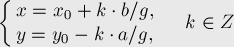

[3] http://e-maxx.ru/algo/diofant_2_equation&usg=ALkJrhhAzF9yCVA7pOjdWhVRIFdPsBlzmA

Below I added a function which give a set of solutions in given range of x and y:

In [3]:
# Accept: original solutions (x0,y0), gcd, a, b
#         list with range [min,max] for x and a list for range for y
def solution_set(x0, y0, gcd, a, b, range_x=[0,100], range_y=[0,100]):
    
    k_min_x = int((range_x[0]-x0)/(b/gcd))
    k_max_x = int((range_x[1]-x0)/(b/gcd))
    k_max_y = int((y0-range_y[0])/(a/gcd))
    k_min_y = int((y0-range_y[1])/(a/gcd))
    
    #k_min will be the max of k_min_x and k_min_y
    k_min = max(k_min_x,k_min_y)
    #k_max will be the min of k_max_x and k_max_y
    k_max = min(k_max_x,k_max_y)
    
    solutions = []
    for k in range(k_min,k_max+1):
        x = int(x0 + k*(b/gcd))
        y = int(y0 - k*(a/gcd))
        solutions.append((x,y))
        
    return solutions


### Real life example:
For a simple example, we can look at the chemical equation below, where oxygen and glucose produce carbon dioxide and water:
$$x⋅O_2 + y⋅C_6H_{12}O_6 => 6CO_2 + 6H_2O$$

We see that if we will look at O, we will have the following equation:
$$ x⋅2 + y⋅6 = 6⋅2 +  6 $$
which can be writen as:
$$ x⋅2 + y⋅6 = 18 $$

In order to solve this equation we will use the functions of the extended Euclidean algoriths and send the results to the set of solution fucntion:


In [255]:
l = ex_Euclidean(2,6,18)
solution_set(x0=l[0],y0=l[1],gcd=l[2],a=2,b=6)

[(0, 3), (3, 2), (6, 1), (9, 0)]

We see that we have 4 options. Based on the Carbon we see that that y need to be 1, which leaves us with the solution (6,1). Of course it could be solved by system of equations, but it leads us to the solution in more complicated equations such as those in cryptography and other fields.

## Inverses of Modular Arithmetic
The extended of the Euclidean algorithm also solves the equation $Nx = K$ (mod $m$) (the same as $Nx$ % $m = K$) where we are given N,K and m. if we will send to the function $a = N, b = m$ and $c = K$, the solution will be the x of the returns value which is the first index. Once we will have the solution we will need to convert it into the field of numbers we are dealing with using the mod value. 

Simple example:

$2x = 1$ (mod $9$) or: $2x$ % $9 = 1$

We can clearly see that the solution for x is 5. Let’s show how the extended Euclidean algorithm will return the solution:


In [116]:
ex_Euclidean(2,9,1)[0]
# [0] is the x of the solution

-4

-4 in modulo 9 is 5, like we said before.

For more advanced example we will consider the following equation:
$$27x = 1 (mod 392)$$

In [146]:
ex_Euclidean(27,392,1)[0]

-29

-29 in modulo 392 is 363, which will be the solution for x.

**check:** we will mutiply 27 by our solution 363 and will use mod 392:

In [118]:
(27*363) % 392

1